# ML Regularisation Forest Fire Prediction

Dataset: https://www.kaggle.com/datasets/nitinchoudhary012/algerian-forest-fires-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Dataset Overview

In [2]:
df0 = pd.read_csv('Algerian_forest_fires_dataset.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

In [5]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is made up of 2 consecutive tables joined together

A new column 'Region' can be added to merge the 2 tables into 1 single table

In [55]:
# Select row: 0th to 121st - Assign 0 to the new col 'region'
df.loc[:122, 'region'] = 0

In [56]:
# Select row: from 122nd onwards - Assign 0 to the new col 'region'
df.loc[122:, 'region'] = 1

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
df[['region']] = df[['region']].astype(int)

In [11]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
region         0
dtype: int64

In [13]:
df = df.dropna().reset_index(drop=True)

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df = df.drop(122).reset_index(drop=True)

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [18]:
# Strip trailing spaces from col names
df.columns = df.columns.str.strip()

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
# Conver col names to lower case
df.columns = df.columns.str.lower()

df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   temperature  243 non-null    object
 4   rh           243 non-null    object
 5   ws           243 non-null    object
 6   rain         243 non-null    object
 7   ffmc         243 non-null    object
 8   dmc          243 non-null    object
 9   dc           243 non-null    object
 10  isi          243 non-null    object
 11  bui          243 non-null    object
 12  fwi          243 non-null    object
 13  classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


### Convert data to the correct types

In [21]:
df[['day','month','year', 'temperature','rh','ws']] = df[['day','month','year', 'temperature','rh','ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   temperature  243 non-null    int64 
 4   rh           243 non-null    int64 
 5   ws           243 non-null    int64 
 6   rain         243 non-null    object
 7   ffmc         243 non-null    object
 8   dmc          243 non-null    object
 9   dc           243 non-null    object
 10  isi          243 non-null    object
 11  bui          243 non-null    object
 12  fwi          243 non-null    object
 13  classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [23]:
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [24]:
objs = [features for features in df.columns if df[features].dtypes=='O']

In [25]:
objs

['rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes']

In [26]:
for i in objs:
    if i != 'classes':
        df[i]=df[i].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Checking Data orderliness

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
rh,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
ffmc,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
dmc,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
dc,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [29]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


### Export Cleaned Dataset

In [30]:
df.to_csv('algerian-forest-fire-dataset_cleaned.csv', index=False)

---

# EDA

In [31]:
# date_cols = ['day','month','year']

# df = df.drop(date_cols,axis=1)

In [32]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [33]:
df['classes'].value_counts()

classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [34]:
df['classes'] = np.where(df['classes'].str.contains('not fire'),0,1)

In [35]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [36]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    int64  
 14  region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


# Feature Engineering

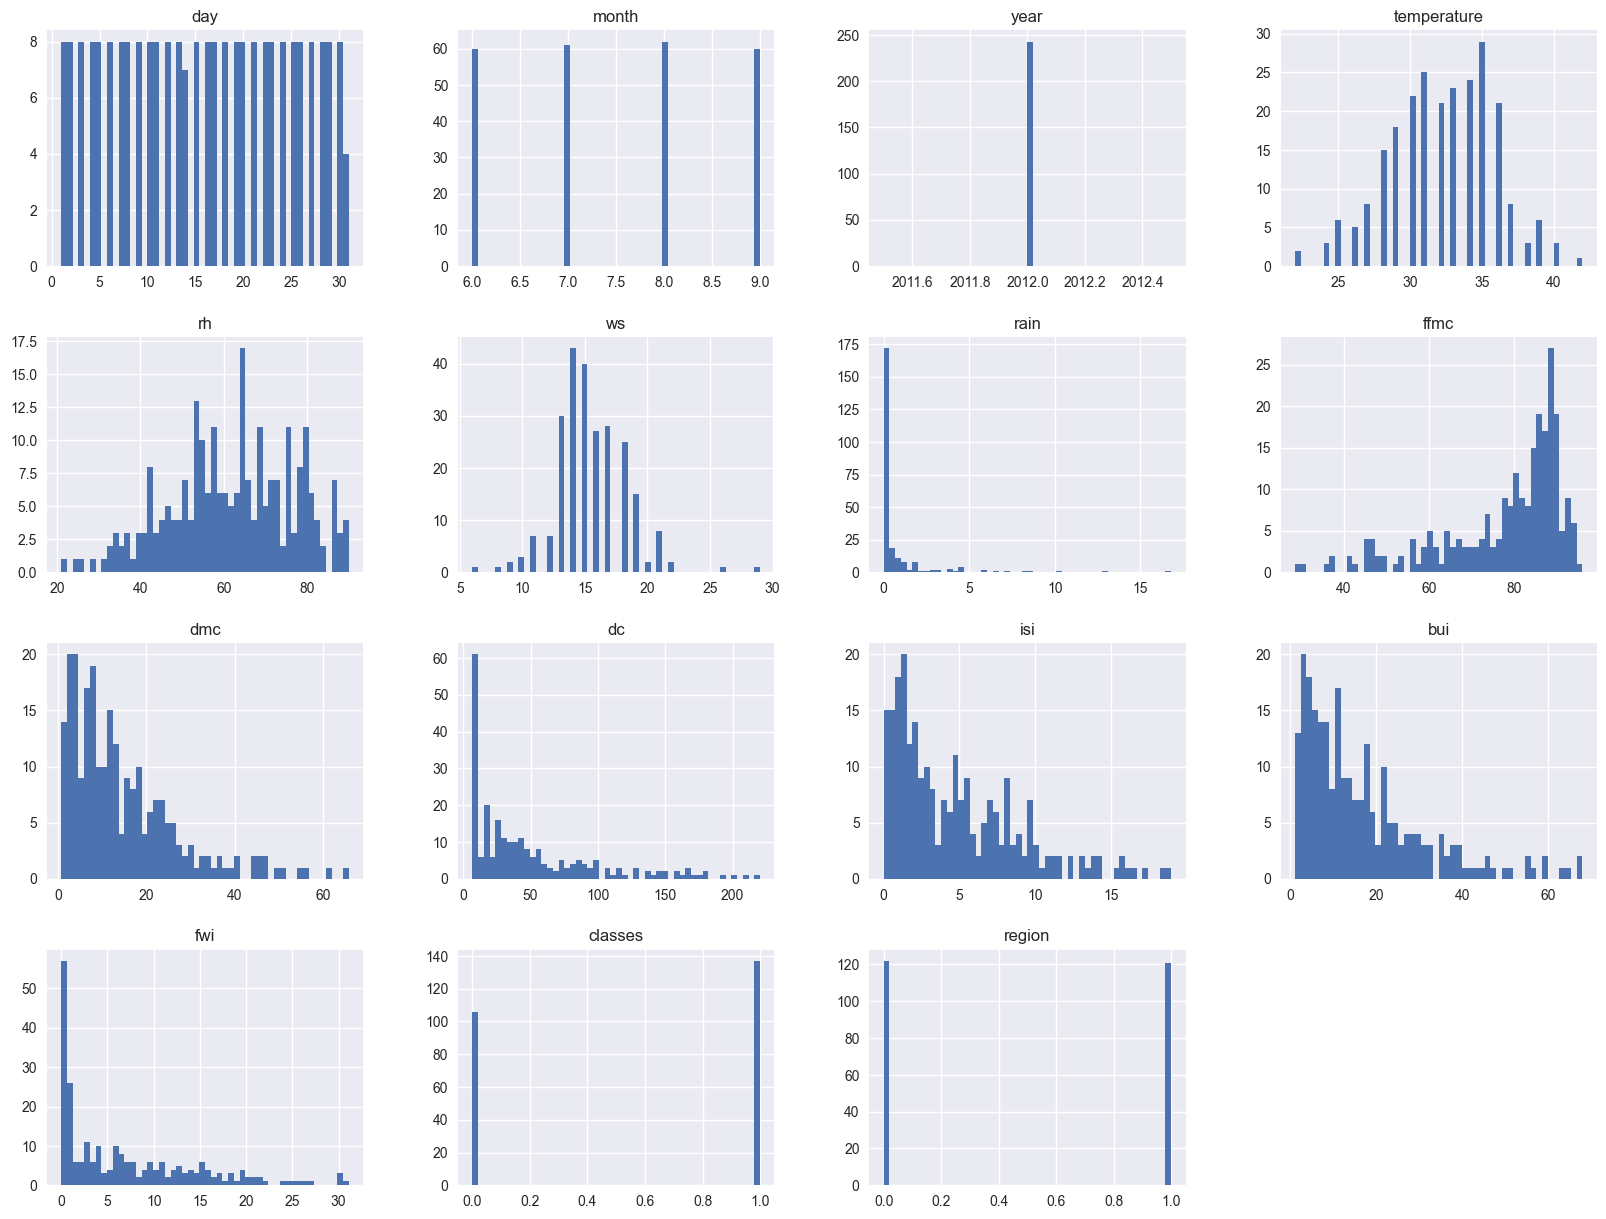

In [38]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50, figsize=(20, 15))

plt.show();

In [39]:
classes_pct = df['classes'].value_counts(normalize=True) * 100

In [40]:
classes_labels = ['Fire','Not Fire']

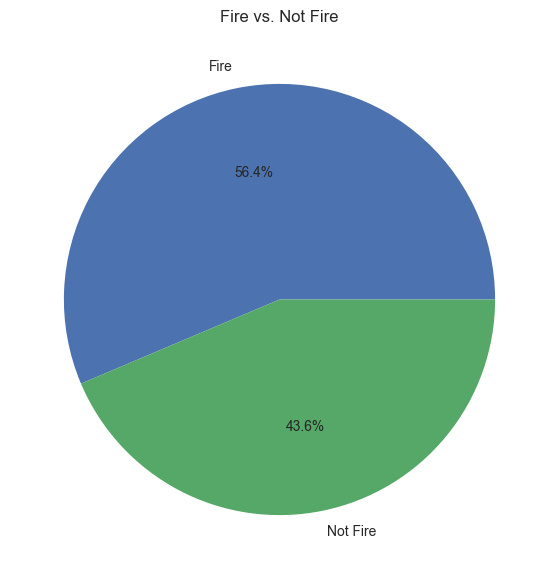

In [41]:
# Pie Chart: Fire vs. Not Fire

plt.figure(figsize=(12,7))
plt.pie(classes_pct,labels=classes_labels,autopct='%1.1f%%')
plt.title('Fire vs. Not Fire')

plt.show();

In [42]:
df_corr = df.corr()

In [43]:
df_corr

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

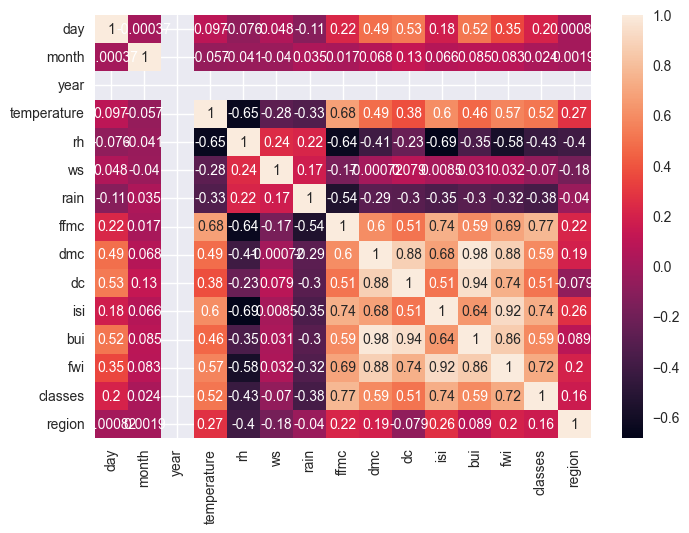

In [44]:
sns.heatmap(df_corr, annot=True)

<Axes: ylabel='fwi'>

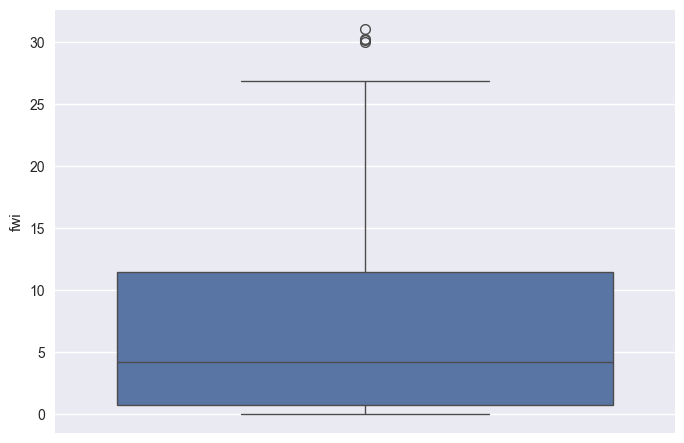

In [45]:
sns.boxplot(df['fwi'])

In [46]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [47]:
df.loc[df['region']== 1]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Region')

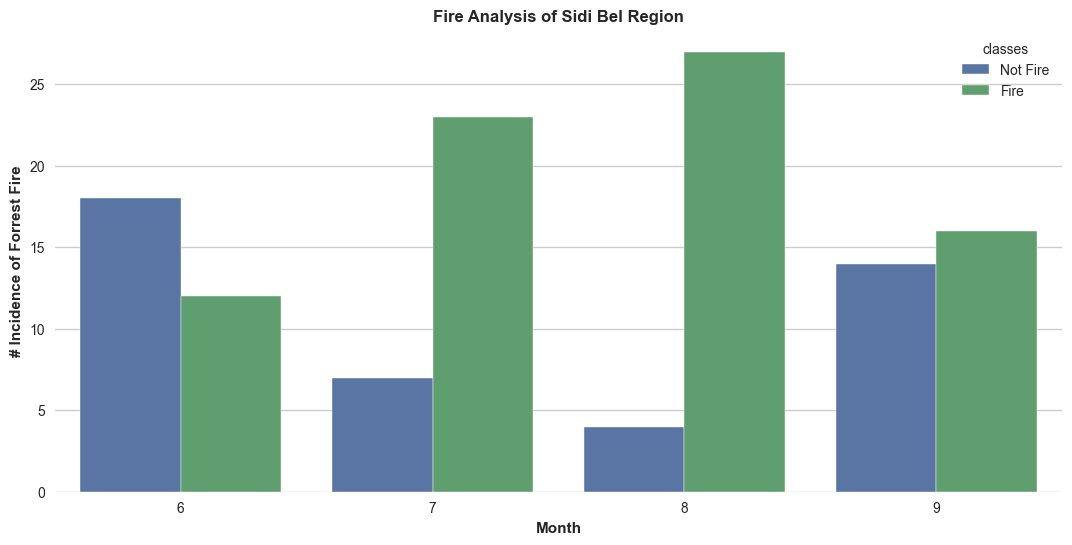

In [54]:
# Monthly Fire analysis

region1 = df.loc[df['region']== 1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region1)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Sidi Bel Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

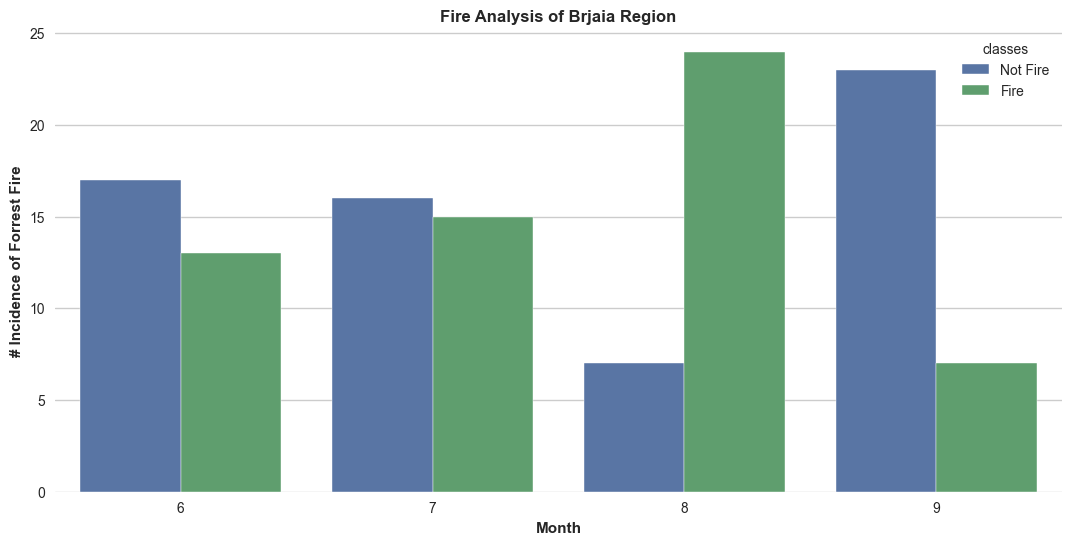

In [53]:
# Monthly Fire analysis

region0 = df.loc[df['region']== 0]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region0)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Brjaia Region', weight='bold')

---

# Model Training

## LassoCV

## RidgeCV

## ElasticNetCV